In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
labels = pd.read_csv("./data/samples.csv")

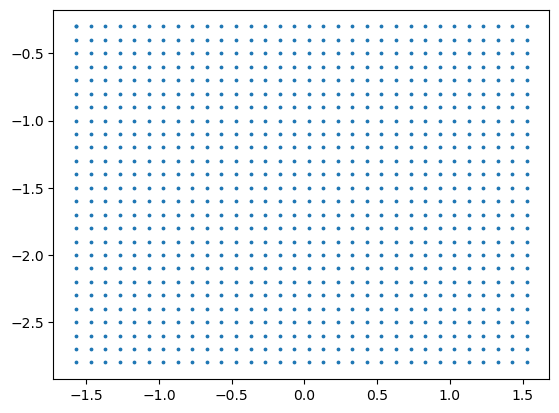

In [3]:
plt.scatter(labels.q_0, labels.q_3, s=3)

In [8]:
import scipy.io.wavfile
import os

inputpath = "./data" 
inputlength =  5
SR = 16000
outputlength = 4096//2
applyFFT = True

inputfiles = os.listdir(inputpath)
n_files = len(labels)
filelen = scipy.io.wavfile.read(inputpath + "/" + "2.wav")[1].shape[0]

recordings = np.full((n_files, filelen, 4), np.nan, dtype=np.int16)


for indx, row in labels.iterrows():
    sr, data = scipy.io.wavfile.read(f"{inputpath}/{row.idx}.wav")
    recordings[indx,:,:] = data[:,1:5]

Text(0.5, 0, 'Starttime of Window [s]')

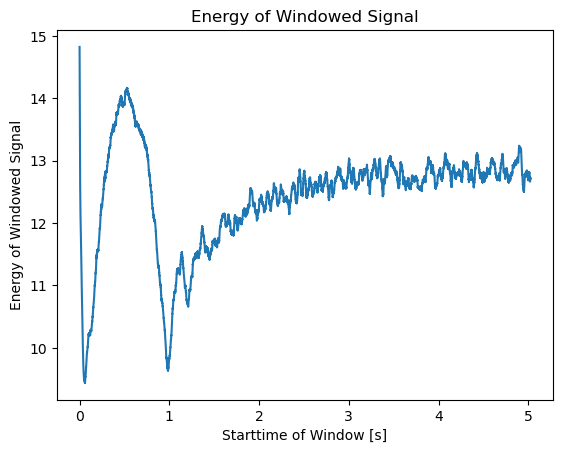

In [9]:
from numpy.lib.stride_tricks import sliding_window_view
normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
windowed_recording = sliding_window_view(normalized_recording**2, 500, axis=1)
energy_per_record = np.sum(windowed_recording, axis=2)

averaged_energy = np.average(energy_per_record, axis=0)
plt.plot(np.arange(len(averaged_energy))/16000, averaged_energy)
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [10]:
len(np.unique(recordings[:,:,0]))

6503

In [11]:
np.log2(2306)

np.float64(11.171176797651771)

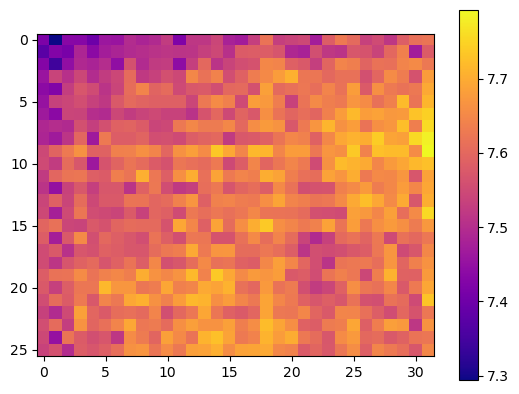

In [12]:
energy = np.sum(normalized_recording**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    #if energy[idx] > 300:
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(np.log(grid), cmap="plasma")
plt.colorbar()

0 1538.7108532516693
1 1378.1613825962959
2 1150.9237799993068
3 1351.4493080784666
4 1351.070999468755
5 1283.2919824543515
6 1352.9588730263254
7 1373.237644955944
8 1445.1208321843678
9 1378.5878359814376
10 1432.0752907825072
11 1489.614060918428
12 1308.0855981840677
13 1439.5195205859222
14 1470.180128247736
15 1510.7535406979985
16 1396.2785970245263
17 1384.5565880202066
18 1473.7159880611366
19 1625.728039044353
20 1476.3721280530747
21 1502.9897959007135
22 1509.3875577629092
23 1372.2294143709814
24 1570.2443512882282
25 1685.1829509502834
26 1604.307976224739
27 1476.6123463574004
28 1492.6352880568004
29 1447.3388761616693
30 1549.528273542189
31 1637.2626213920314
32 1634.0198210331355
33 1582.5439599729639
34 1398.2695005086703
35 1649.1860918751784
36 1586.5854881010123
37 1459.040302676221
38 1525.7689529954564
39 1560.4459051865947
40 1438.0369987893375
41 1454.6678332401045
42 1491.1160998128782
43 1350.4719780443322
44 1387.4895628706513
45 1549.203718893026
46 1578

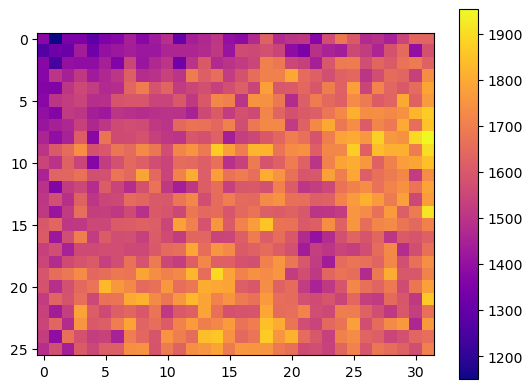

In [13]:
energy = np.sum(normalized_recording[:,16000:]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 200:
        print(idx, energy[idx])
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

Text(0.5, 0, 'Starttime of Window [s]')

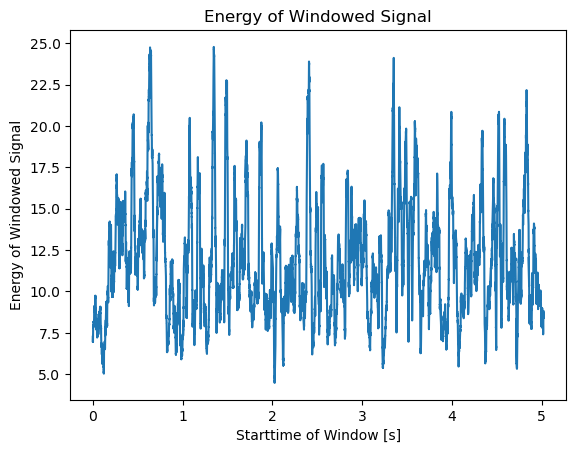

In [14]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[773])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [15]:
labels.iloc[773]

idx              774
q_0          -1.1708
q_1              0.0
q_2              0.0
q_3             -2.7
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         0
notes               
Name: 773, dtype: object

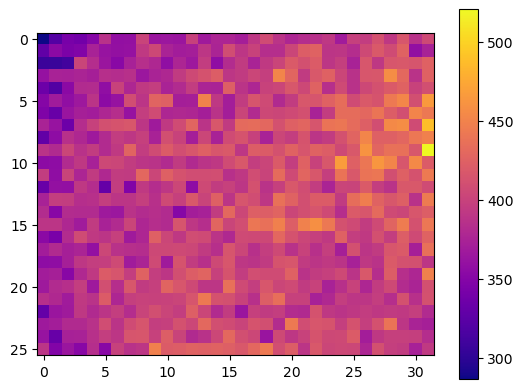

In [16]:
energy = np.sum(normalized_recording[:,:16000]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 800:
        print(idx, energy[idx])
        continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

In [17]:
labels.iloc[671]

idx              672
q_0           1.4292
q_1              0.0
q_2              0.0
q_3             -2.3
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         0
notes               
Name: 671, dtype: object

Text(0.5, 0, 'Starttime of Window [s]')

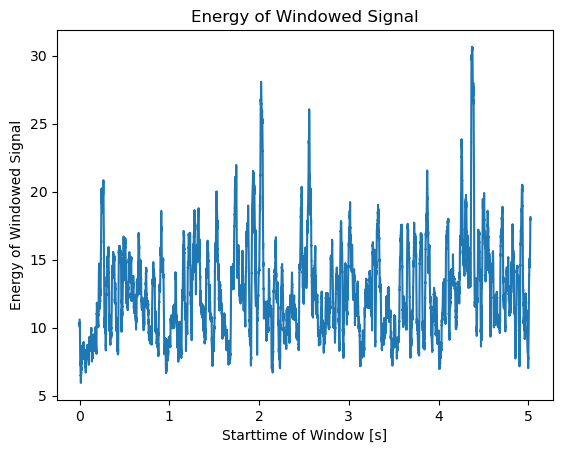

In [18]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[671])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

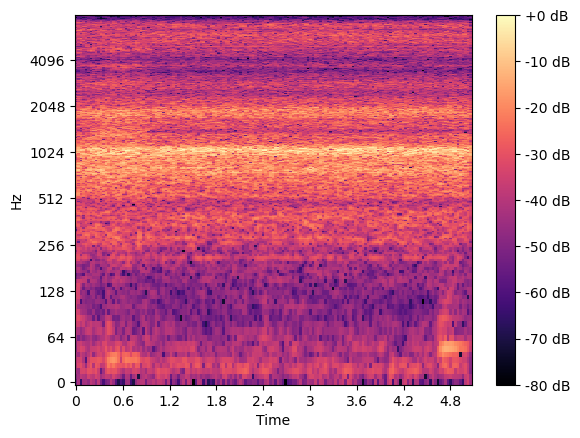

In [19]:
import librosa
sig = normalized_recording[773,:]

D = librosa.stft(sig)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
ref = np.max(np.abs(D))

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

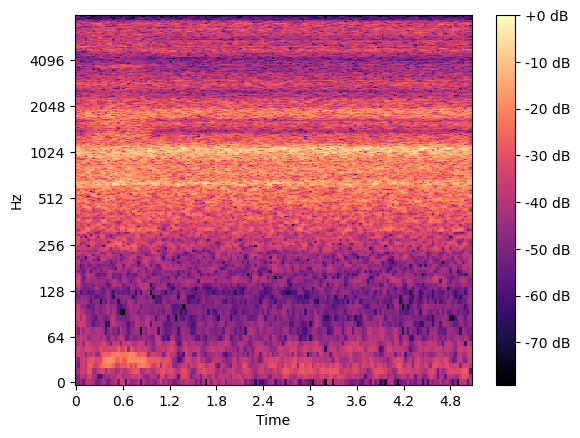

In [20]:
sig = normalized_recording[406,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

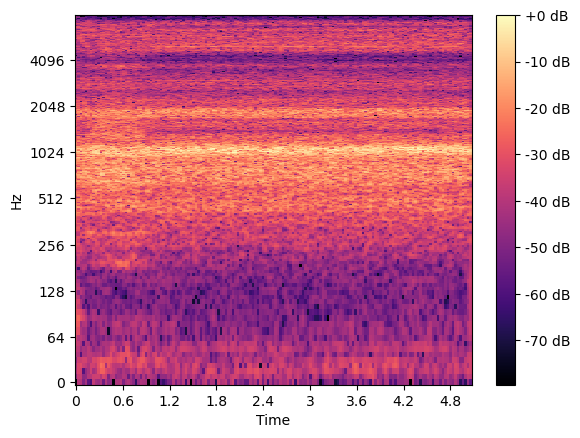

In [21]:
sig = normalized_recording[671,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

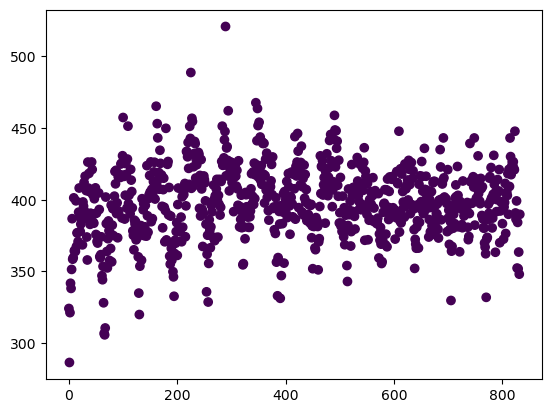

In [22]:
plt.scatter(np.arange(len(energy)), energy, c=labels.session_id)

In [23]:
def map_data_to_grid(data):
    grid = np.full((26,32), np.nan)
    for idx, row in labels.iterrows():
        x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
        if x_pos < 0:
            continue
        y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
        grid[y_pos, x_pos] = data[idx]
    return grid



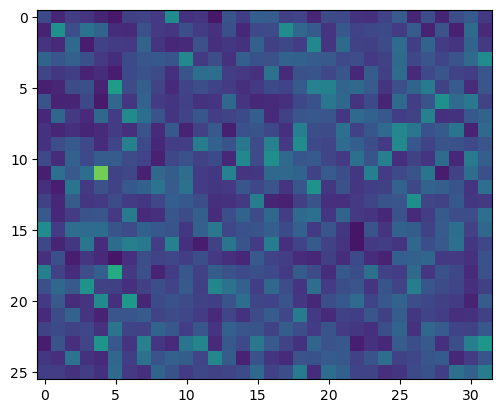

In [24]:
import matplotlib.animation as animation

maxval = np.max(energy_per_record)
minval = np.min(energy_per_record)

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(map_data_to_grid(energy_per_record[:, i]), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy_contact_joint0.mp4')
plt.show()

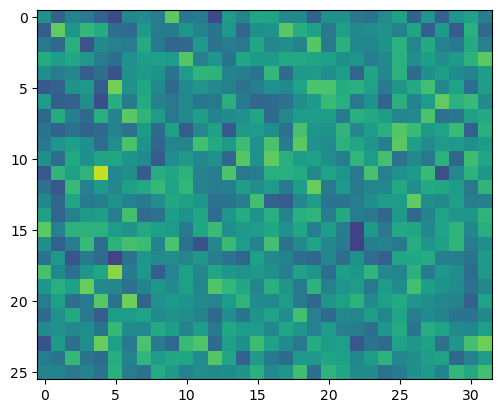

In [25]:
import matplotlib.animation as animation

maxval = np.log(np.max(energy_per_record))
minval = np.log(np.min(energy_per_record))

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(np.log(map_data_to_grid(energy_per_record[:, i])), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy_log_contact_joint0.mp4')